In [2]:
import numpy as np
import scipy.io as sio
import cvxpy as cvx
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mat_contents = sio.loadmat('meanvariance.mat')
mu = mat_contents['mu']
S = np.matrix(mat_contents['S'])
d = np.size(mu)

R = (mu.max() - mu.min())/2
print(R)

3.2613405508603286


Optimal portfolio


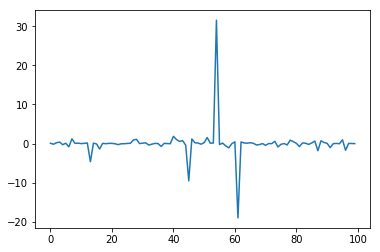

In [18]:
z = cvx.Variable(d)

objective = cvx.Minimize(cvx.quad_form(z,S))
constraints = [mu.T*z == R, sum(z) == 1]

prob = cvx.Problem(objective,constraints)
prob.solve()

print('Optimal portfolio')
plt.plot(z.value)

Sharpe Optimal portfolio


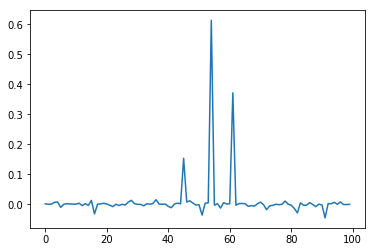

In [22]:
# Sharpe Optimal Portfolio
objective = cvx.Minimize(cvx.quad_form(z,S))
constraints = [mu.T*z == 1]

prob = cvx.Problem(objective,constraints)
prob.solve()

phi = z.value/z.value.sum()

print('Sharpe Optimal portfolio')
plt.plot(phi)